# Car Purchasing Model

https://www.kaggle.com/dev0914sharma/car-purchasing-model

## Task

You are working as a data scientist in an automobile company.
You would like to develop a model to predict the total amount that customers are willing to pay for the new car. This information will be used by the company to do the targeted marketing based on the customer profile.

## File

This File contain the information of the various people with the following detail which can help us to find out the better prediction and also help us to train our model to predict the correct value and get a good F1 Score.

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth (Asset – Liabilities)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('data/archive.zip')
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


## Check data

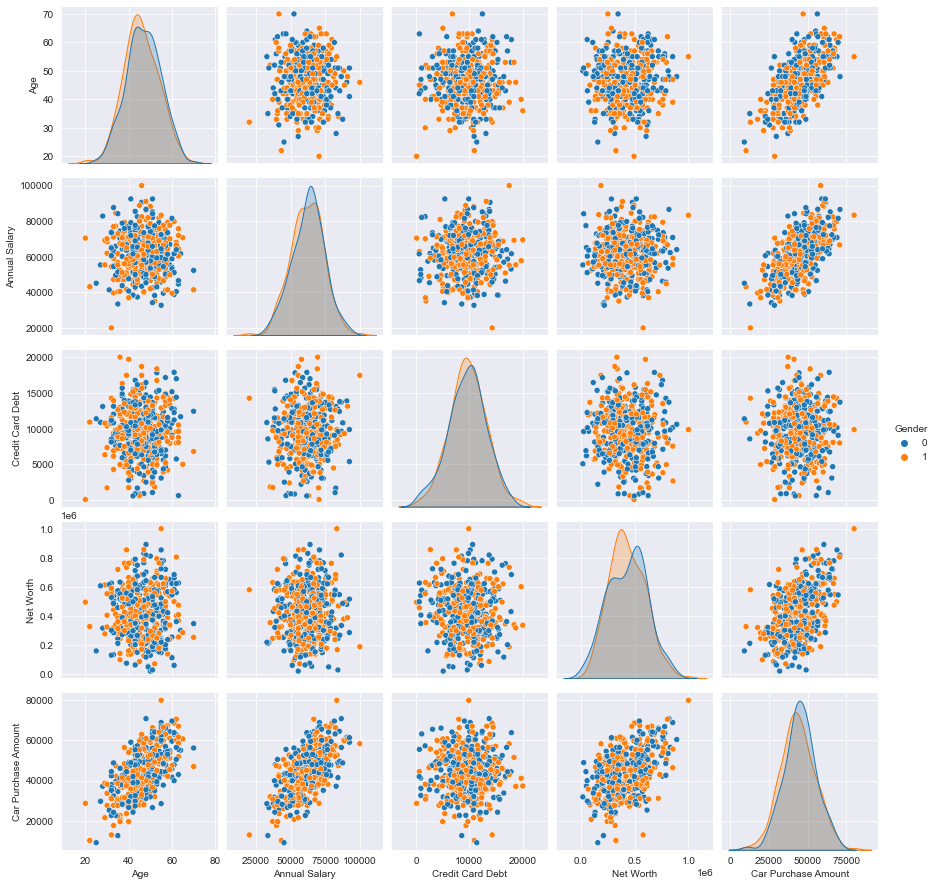

In [5]:
sns.set_style('darkgrid')
g = sns.pairplot(df, hue='Gender')

<AxesSubplot:>

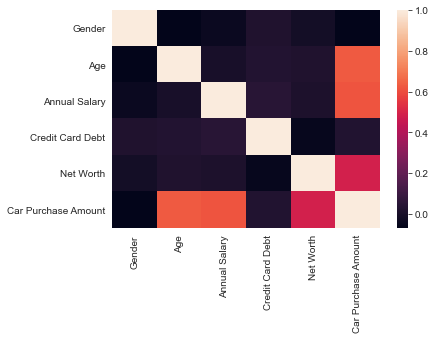

In [6]:
sns.heatmap(df.corr())

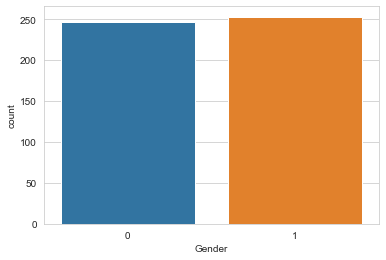

In [7]:
sns.set_style('whitegrid')
g = sns.countplot(x='Gender',data=df)

## Building the Regression Model

### Train - Test - Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [10]:
X = df[['Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y = df['Car Purchase Amount']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.30, 
                                                    random_state=101
                                                   )

## Creating and Training the Model - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
# print the intercept
print(lm.intercept_)

-42070.418113818836


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Gender,33.373798
Age,840.914384
Annual Salary,0.561746
Credit Card Debt,0.004059
Net Worth,0.028876


In [28]:
predictions = lm.predict(X_test)

my_predictions = lm.predict([1,45,75000, 10000,180000], 
                            [0,45,75000, 10000,180000]
                           )

TypeError: unhashable type: 'list'

In [27]:
X_test

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
18,1,52,54503.14423,7377.820914,431098.9998
361,0,36,74420.10254,10274.135580,551344.3365
104,0,48,63975.06090,10614.854490,891439.8761
4,1,57,59729.15130,5358.712177,560304.0671
156,0,51,34154.77654,5316.010491,216355.3406
...,...,...,...,...,...
147,0,61,38779.18396,12758.895830,581497.8874
346,0,33,54912.44043,8203.562630,537572.1338
423,0,43,85475.64202,13786.149420,267555.1178
17,1,48,52682.06401,12514.520290,549443.5886


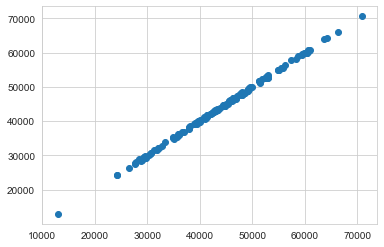

In [18]:
plt.scatter(y_test,predictions)

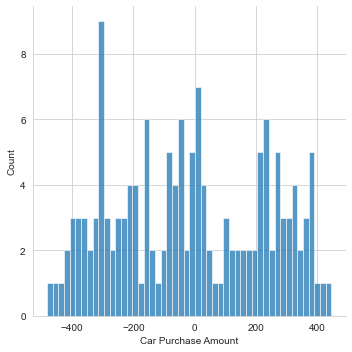

In [19]:
sns.displot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

In [20]:
from sklearn import metrics

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))
print('Test set score:', lm.score(X_train,y_train))

Mean Absolute Error: 211.94466044343187
Mean Squared Error: 61331.29285217074
Root Mean Squared Error: 247.65155531950683
R2: 0.9993733378621694
Test set score: 0.9995421717309187


## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
print('Train set mse:', metrics.mean_squared_error(y_train, RFR.predict(X_train)))
print('Test set mse:', metrics.mean_squared_error(y_test, RFR.predict(X_test)))
print('R2:', metrics.r2_score(y_test, predictions))
print('Test set score:', RFR.score(X_train,y_train))
prediction = RFR.predict(X_test)

Train set mse: 888097.004038789
Test set mse: 9074466.59221874
R2: 0.9993733378621694
Test set score: 0.9928086399853661


In [24]:
prediction = list(map(round, prediction))